In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, t_train), (x_test, t_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


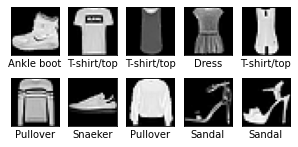

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Snaeker', 'Bag', 'Ankle boot']

sample_size = 10
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[t_train[i]])
plt.show()

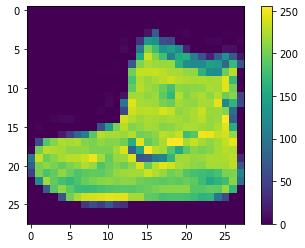

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

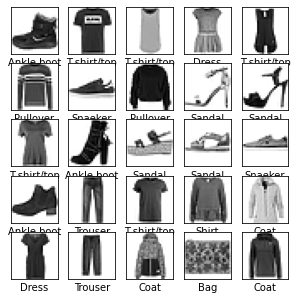

In [5]:
plt.figure(figsize = (5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[t_train[i]])
plt.show()

In [6]:
# 0 - 1 q범위로 만듭니다.
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형형태로 변경
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

# 검증 데이터 셋
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 0.7/0.3 비율로 분리합니다.
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                  test_size=0.3,
                                                 random_state=777)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
# 입력 데이터 형태 꼭 명시하기!
first_model.add(Flatten(input_shape=(28, 28))) # (28, 28) -> (28 * 28)
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [8]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
first_history = first_model.fit(x_train, t_train,
                               epochs = 30,
                               batch_size = 128,
                               validation_data=(x_val, t_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 18us/sample - loss: 0.6479 - acc: 0.7796 - val_loss: 0.4760 - val_acc: 0.8357
Epoch 2/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.4445 - acc: 0.8432 - val_loss: 0.4270 - val_acc: 0.8502
Epoch 3/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3986 - acc: 0.8599 - val_loss: 0.4038 - val_acc: 0.8578
Epoch 4/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3805 - acc: 0.8635 - val_loss: 0.3810 - val_acc: 0.8650
Epoch 5/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3546 - acc: 0.8740 - val_loss: 0.3918 - val_acc: 0.8613
Epoch 6/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3389 - acc: 0.8779 - val_loss: 0.3568 - val_acc: 0.8724
Epoch 7/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3263 - acc: 0.8814 - val_loss: 0.

In [10]:
second_model = Sequential()

# 입력 데이터의 형태를 꼭 명시
second_model.add(Flatten(input_shape = (28, 28)))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='relu'))

second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(x_train, t_train,
                                 epochs=30,
                                 batch_size=128,
                                 validation_data=(x_val, t_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 21us/sample - loss: nan - acc: 0.2056 - val_loss: nan - val_acc: 0.0973
Epoch 2/30
42000/42000 [==============================] - 1s 13us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 3/30
42000/42000 [==============================] - 1s 14us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 4/30
42000/42000 [==============================] - 1s 14us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 5/30
42000/42000 [==============================] - 1s 14us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 6/30
42000/42000 [==============================] - 1s 14us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 7/30
42000/42000 [==============================] - 1s 13us/sample - loss: nan - acc: 0.1012 - val_loss: nan - val_acc: 0.0973
Epoch 8/30
42000/42

In [15]:
def draw_loss_acc(history_1, history_2, epochs):
    his_dict1 = history_1.history
    his_dict2 = history_2.history
    keys = list(his_dict1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1,1,1)
    ax.spines['top'].set_color('name')
    ax.spines['bottom'].set_color('name')
    ax.spines['left'].set_color('name')
    ax.spines['right'].set_color('name')
    ax.tick_params(labelcolor='w', top=False,
                  botom=False, left = False, right = False)
    for i in range(len(his_dict1)):
        temp_ax = fig.add_subplot(2,2, i + 1)
        temp = keys[i%2]
        val_temp=keys[(i+2)%2 + 2]
        temp_history = his_dict1 if i < 2 else his_dict2
        temp_ax.plot(epochs, temp_history[temp][1:],
                    color='blue', label = 'Train_'+temp)
        temp_ax.plot(epochs, temp_shitory[val_temp][1:],
                    color='orange', label=val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2),end, 0.01))
            temp_ax.legend()
    ax.set_ylabel('loss', size=20)
    ax.set_xlabel('Epochs',size=20)
    plt.tight_layout()
    plt.show()
    
draw_loss.acc(first_history, second_history, 30)

NameError: name 'draw_loss' is not defined